In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

1. Load the data

- Import pandas as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the dat folder, saving it as past.

- Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories.

In [11]:
past = pd.read_csv('../dat/past.csv.gz')
past.sample(3)
past.columns

# Total no of columns
print(f'Total number of features in the dataset are: {len(past.columns)}')


,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
3332,5802676,4.818720e+08,2.166667,1.333333,807324.833333,5.790,5.691667,1.0,0.666667,0.5,...,0.166667,0.166667,0.0,0.0,0.333333,0.166667,0.333333,1,0.0,1.333333
1288,5930768,5.957735e+08,2.000000,1.000000,28.000000,0.715,0.715000,1.0,0.000000,1.0,...,0.000000,0.500000,0.0,0.5,0.000000,0.000000,0.000000,0,0.0,1.000000
3772,5877107,5.607741e+08,2.000000,2.000000,299.000000,6.900,6.900000,0.0,2.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0,0.0,1.000000


Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

Total number of features in the dataset are: 37


2. What percentage of interaction resulted in purchase ?

- Q1. Do people mostly buy what they look for or 'Window Shopping'
- Q2. Is the class data balanced ?

In [14]:
# Percentage of rows that resulted in purchase vs non-purchase
past['Purchased?'].value_counts() / past.shape[0]

print('A1. Approx - 66 % of peoplae are involved in window shopping')
print('A2. The data is imbalanced')

0    0.6562
1    0.3438
Name: Purchased?, dtype: float64

A1. Approx - 66 % of peoplae are involved in window shopping
A2. The data is imbalanced


3. Droping the `product_id` and `user_id` columnn from the dataset. 

- Save the features columns in dataframe `X` and label column in dataframe `y`

In [16]:
print(f'The shape of the original dataset : {past.shape}')
X = past.drop(columns=['product_id','user_id'], axis=1)
print(f'The shape of X {X.shape}')

y = X.pop('Purchased?') # It will remove the Purchased Columns from X dataframe and put in y dataframe
print(f'The final shape of features and label datasets {X.shape, y.shape}')

# Test function
assert X.shape == (5000, 34)
assert y.shape == (5000, )

The shape of the original dataset : (5000, 37)
The shape of X (5000, 35)
The final shape of features and label datasets ((5000, 34), (5000,))


4. Apply `PCA` to reduce the number of features to 5 and save the output in a numpy array `X_reduced`

- Q1. Do we need to pre-process the data by Min Max Scaling ?
- Q2. Does mean centering or feature scaling effect the PCA ?

4.1 PCA Analysis without scaling

The explained ratio is [1.00 0.00 0.00 0.00 0.00]
All the explained variance has been associated with just one PCA


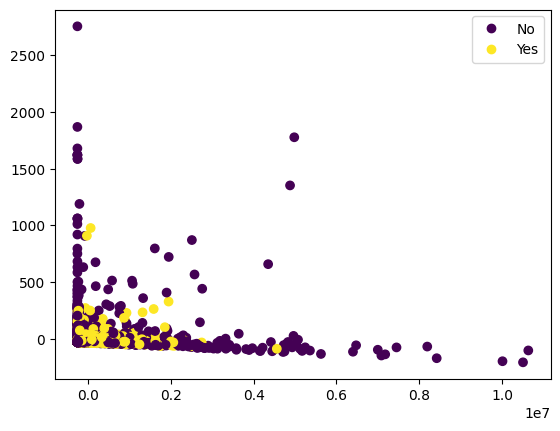

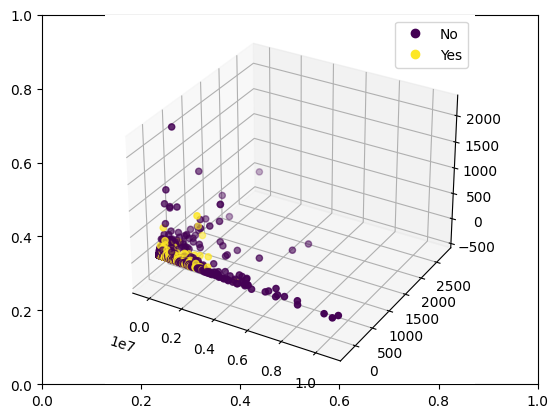

In [23]:
# Imports
from sklearn.decomposition import PCA

# without sclaing
pca = PCA(n_components=5, random_state=0).fit(X)
X_reduced_no_scaling = pca.transform(X)

# Test the shape
assert X_reduced_no_scaling.shape == (5000, 5)

# Print out the %age of variance explained by the PCA Components
np.set_printoptions(precision=2, suppress=True, floatmode='fixed')
print(f'The explained ratio is {pca.explained_variance_ratio_}')
print('All the explained variance has been associated with just one PCA')

# Visualise the few PCA Components
def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:, 0], pcs[:, 1], c=y)
    ax.legend(
        handles=plot.legend_elements()[0],
        labels=['No', 'Yes']
    )

def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:, 0], pcs[:, 1], pcs[:, 2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0],
        labels=['No', 'Yes']
    )

visualize_2pcs(X_reduced_no_scaling, y)
visualize_3pcs(X_reduced_no_scaling, y)

4.2 Versus PCA Analysis with Min-Max Scaling

The explained ratio is [0.10 0.09 0.07 0.05 0.04]
All the explained variance has been associated with more than two or three PCA


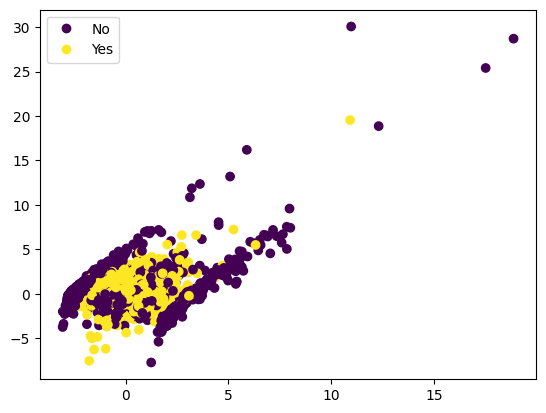

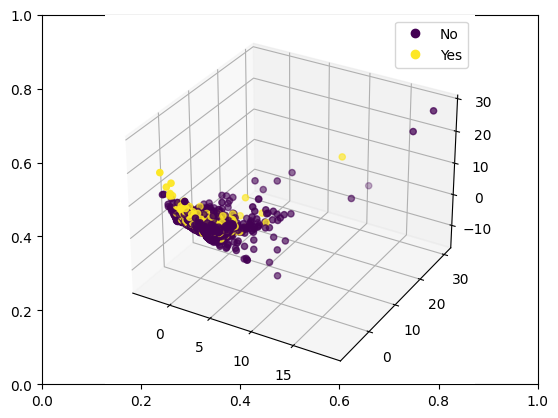

In [25]:
# Imports
from sklearn.preprocessing import StandardScaler

# without sclaing
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5, random_state=0).fit(X_scaled)
X_reduced_with_scaling = pca.transform(X_scaled)

# Test the shape
assert X_reduced_with_scaling.shape == (5000, 5)

# Print out the %age of variance explained by the PCA Components
np.set_printoptions(precision=2, suppress=True, floatmode='fixed')
print(f'The explained ratio is {pca.explained_variance_ratio_}')
print('All the explained variance has been associated with more than two or three PCA')

visualize_2pcs(X_reduced_with_scaling, y)
visualize_3pcs(X_reduced_with_scaling, y)

5. Compare the analysis of PCA with groundtruth. The prediction performance using given reduced features (engineered) vs non-engineered features

- Build a wrapper function 
    - Takes features, target, and a boolean parameter indicating whether to include standardization or not
    - Split the data in train (80 %) and test (20 %) and `random_state=0`
    - A `Pipeline` that preprocess the data `StandardScaler` , if True then do otherwise `pass` and apply `LogisticRegression`
    - Fit the `Pipeline` on training data
    - Print the `sklearn.metrics.classification_report` on test data



In [30]:
# Usual Imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


def train(X, y, standardize=True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    scaler = StandardScaler()
    logistic = LogisticRegression(class_weight='balanced')
    if standardize==True:
        pipe = Pipeline(steps=[('scaler', scaler), ('logistic', logistic)])
    else:
        pipe = Pipeline(steps=[('logistic', logistic)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
train(X, y)
train(X_reduced_no_scaling, y, standardize=False)
train(X_reduced_with_scaling, y, standardize=False)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       649
           1       0.65      0.44      0.52       351

    accuracy                           0.72      1000
   macro avg       0.69      0.65      0.66      1000
weighted avg       0.71      0.72      0.70      1000

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       649
           1       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.62      1000
weighted avg       0.66      0.65      0.65      1000


The metrics and ac

> The metrics and accuracy generally slightly decreased a few points when using pca. 
As a con, it appears that some useful data was left out when reducing the number of dimensions in the feature space 
and in fact only ~35% of the explained variance was captured. 

> As a pro, the reduced dimensionality of the feature space may produce a better model, 
will allow for a more efficient convergence, and will possibly help mitigate against overfitting to some degree

#### Let's do K-Means clustering on the reduced features after PCA

1. Apply K-Means clustering on the engineered `X_reduced_with_scaling`, Experiment with different values under `n_clusters`

- Summarize all the information with **Elbow Plot**
- Start by fitting K-means on `X_reduced_with_scaling` and with range of values of `k`, setting `random_state=10`
- Append the sum of sqaured distances of samples to their closest cluster center for each `k` to list `inertias`

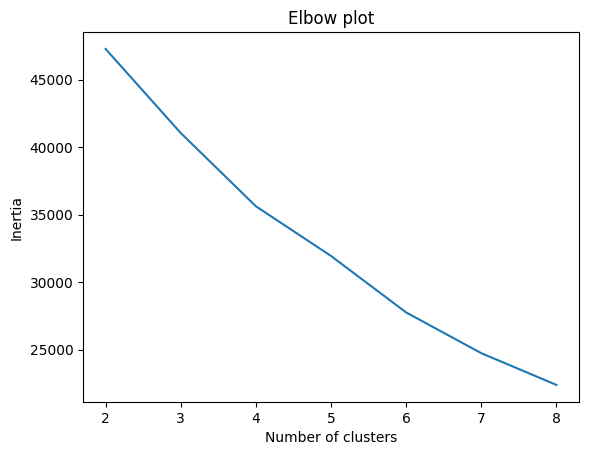

In [31]:
# Imports
from sklearn.cluster import KMeans

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertia = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=10).fit(X)
        inertia.append(km.inertia_)
    plt.plot(ks, inertia)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

k = range(2, 9)
visualize_elbow(X_reduced_with_scaling, k)


> As it is difficult to notice the steep drop in SS(distance) or inertia, the elbow plot does not provide clear answer to the choice of cluster

2. Silhoutte Approoach

- Use the custom function `visualize_silhouette` from utils.py to plot the Silhoutter Scores and visualize the K-means for k range from 2 to 8 on the `X_reduced_with_scaling`

For n_clusters = 2 The average silhouette_score is : 0.2519151215935092
For n_clusters = 3 The average silhouette_score is : 0.26018095222228077
For n_clusters = 4 The average silhouette_score is : 0.27395794585615874
For n_clusters = 5 The average silhouette_score is : 0.24091287030705594
For n_clusters = 6 The average silhouette_score is : 0.24514274761107963
For n_clusters = 7 The average silhouette_score is : 0.2514299822056718
For n_clusters = 8 The average silhouette_score is : 0.26234942837485664


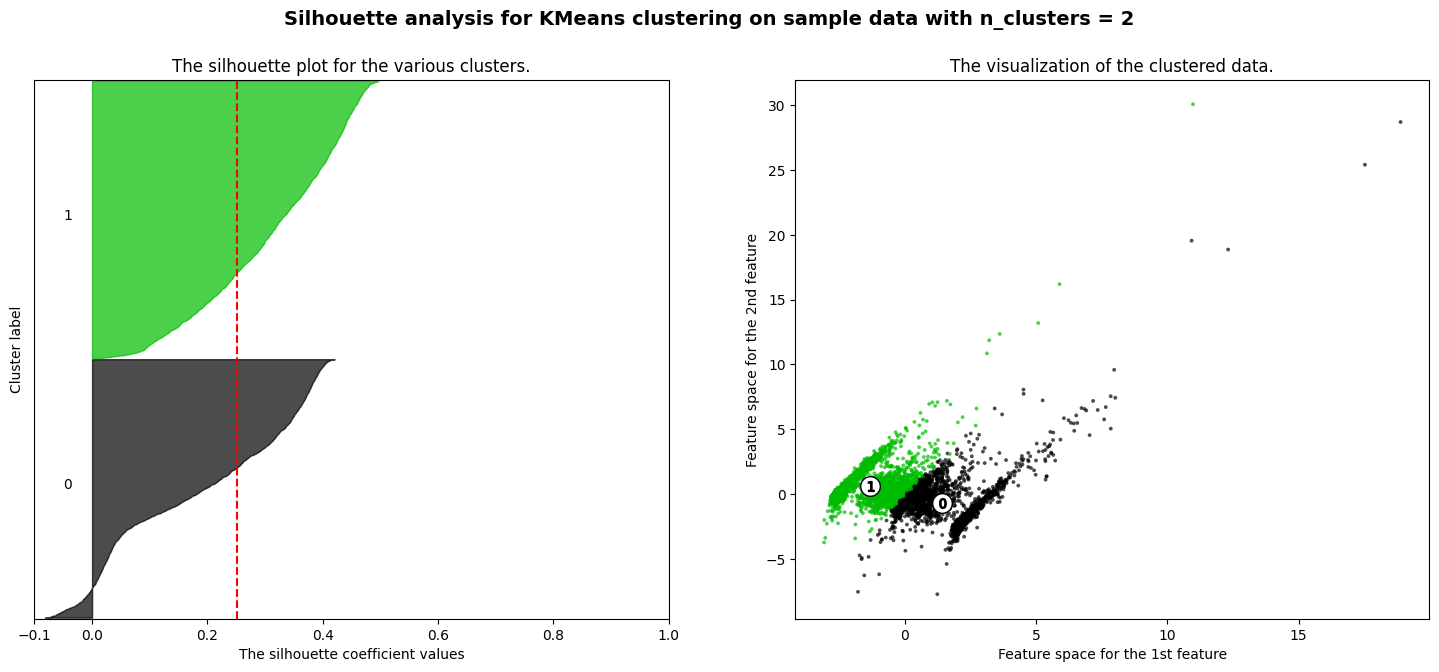

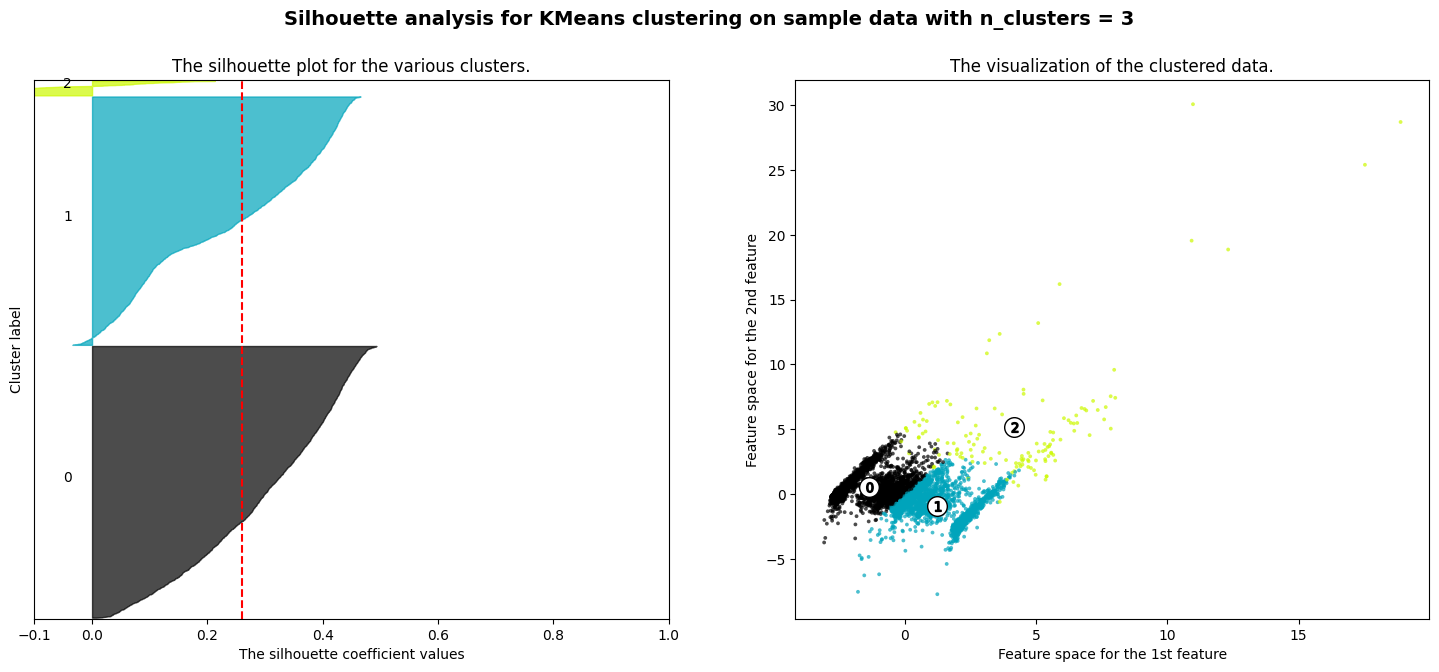

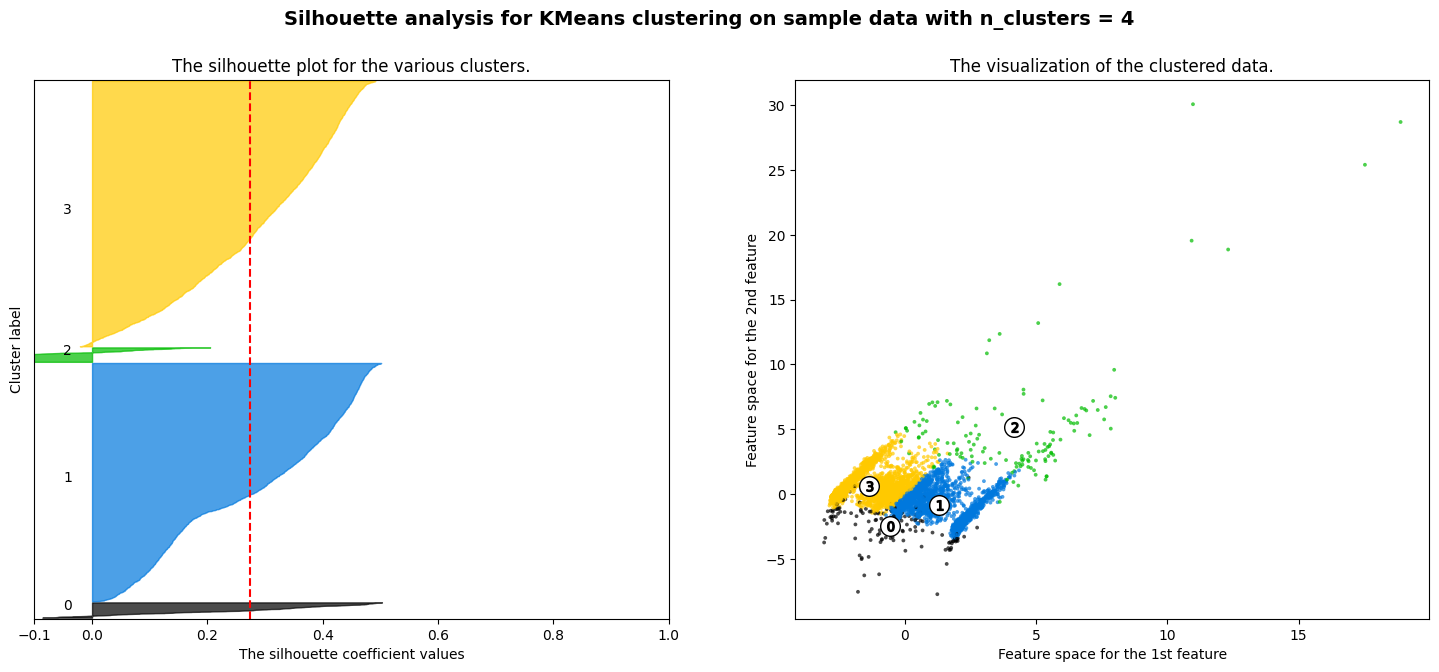

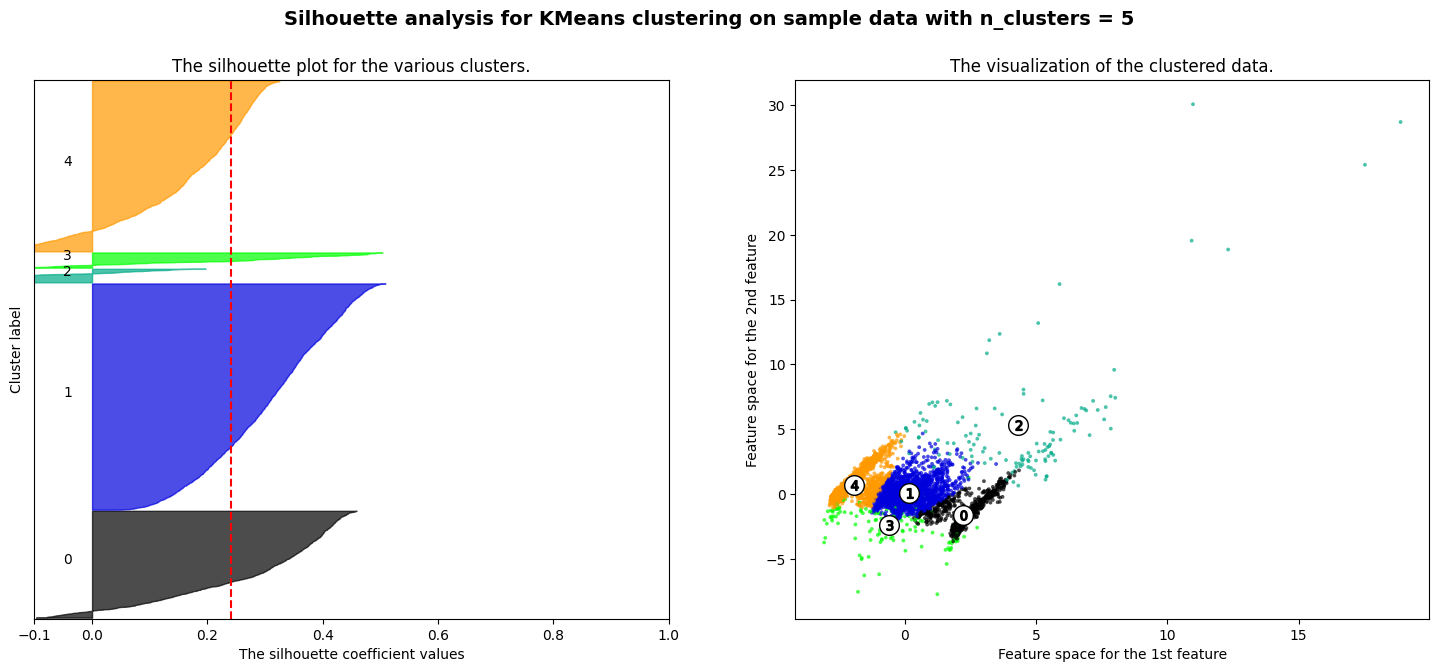

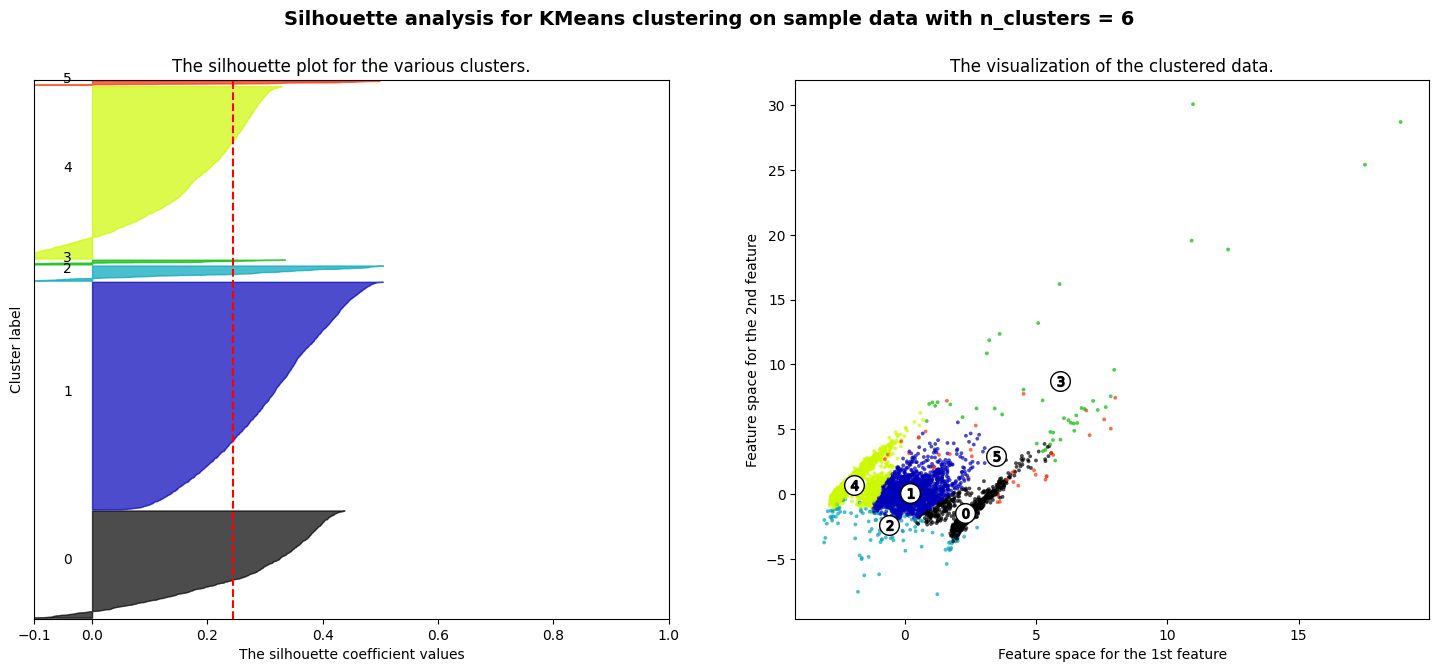

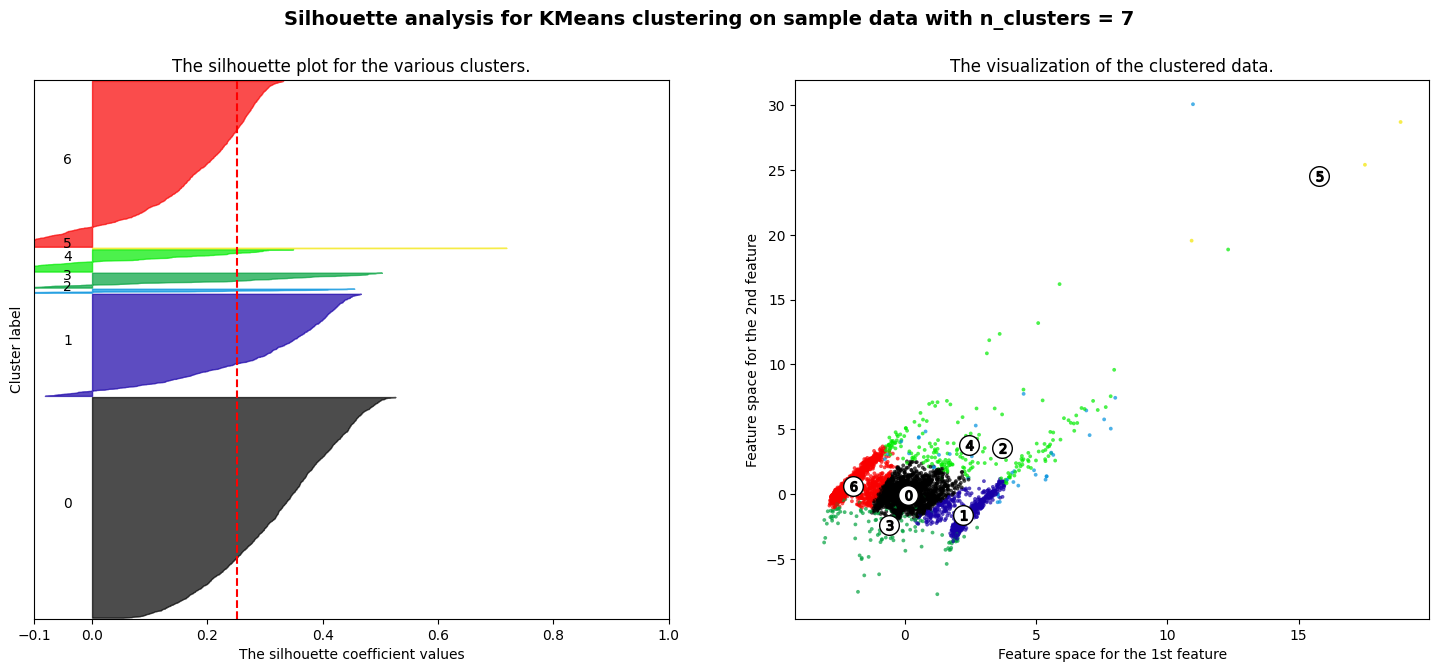

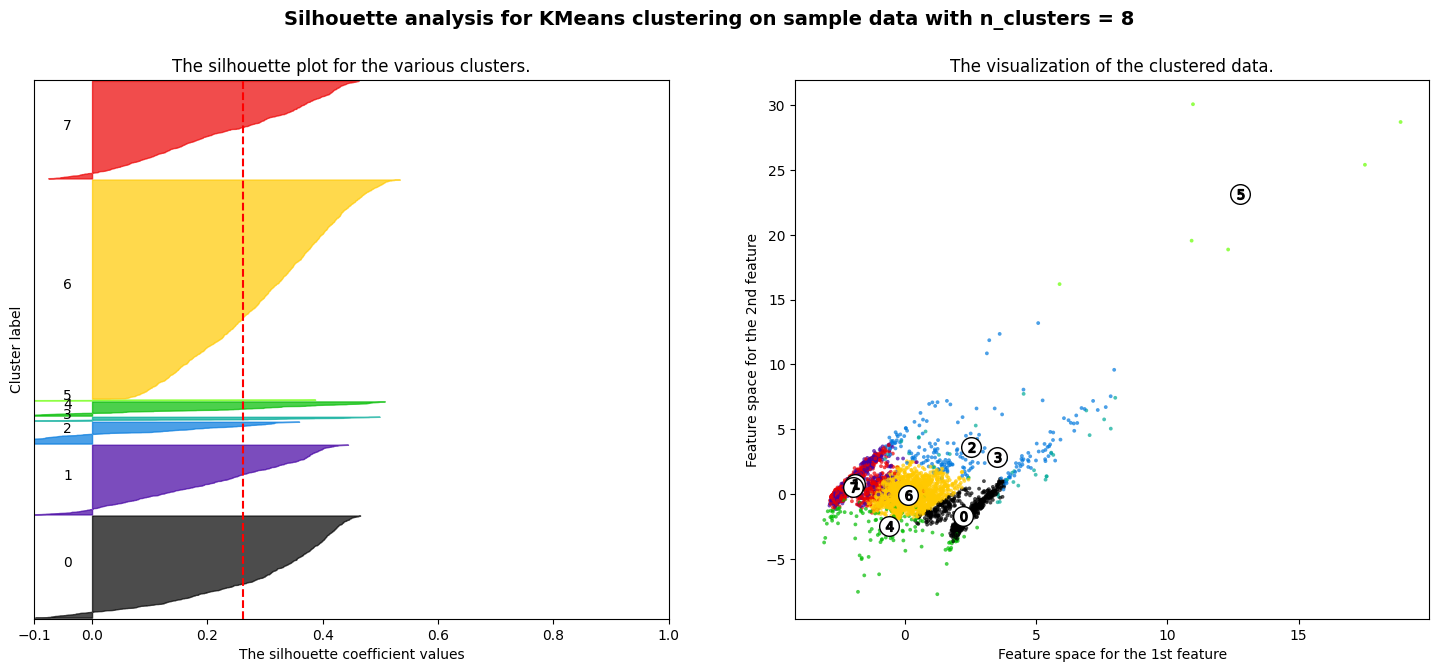

In [32]:
# Imports
from utils import visualize_silhouette
visualize_silhouette(max_clusters=8, X=X_reduced_with_scaling, random_state=10)

> Highest score can be observed for the n = 4 *For n_clusters = 4 The average silhouette_score is : 0.27395794585615874*

3. Instatiate a K-Means for the cluster that is deemed to be optimal and assign to km and fit on the engineered data

In [37]:
km = KMeans(n_clusters=4, random_state=0).fit(X_reduced_with_scaling)
# The unique labels == the No of cluster that we chose 
set(km.labels_)

# What is the size of each cluster?
unique_elements, count_elements = np.unique(km.labels_, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, count_elements)))


{0, 1, 2, 3}

Frequency of unique values of the said array:
[[   0    1    2    3]
 [2240  136 2481  143]]


4. Create a new column in the `past` dataframe with `cluster_pca` with values as predicted under predicted by `km`


In [38]:
past['cluster_pca'] = km.labels_ # add column with predicted cluster number to data for cluster analysis purposes
pd.set_option("display.max_columns",None)
past.head(3)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,InsessionRemove,Weekend,Fr,Mon,Sat,Sun,Thu,Tue,Wed,2019,2020,Jan,Feb,Oct,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
0,5866936,5.618978e+08,1.333333,1.333333,5550.0,15.8400,15.8400,0.00,1.333333,0.00,0.00,1.00,0.0,0.0,0.00,0.333333,0.00,0.00,0.333333,0.00,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.00,0.00,0.00,0.0,0.666667,0.333333,0.00,0.0,0,0.0,1.0,0
1,5647110,5.326529e+08,2.250000,1.500000,27556.5,5.8000,5.5650,1.25,0.250000,0.25,3.75,2.25,9.0,0.0,0.00,0.250000,0.00,0.25,0.000000,0.25,0.250000,0.500000,0.500000,0.000000,0.500000,0.000000,0.25,0.25,0.75,0.0,0.000000,0.250000,0.00,0.0,0,0.0,1.0,0
2,5790472,4.578109e+08,1.000000,1.000000,0.0,6.2725,6.2725,0.25,0.750000,0.00,17.25,30.00,2.5,0.0,0.25,0.250000,0.25,0.25,0.000000,0.00,0.000000,0.500000,0.500000,0.000000,0.500000,0.250000,0.25,0.00,0.00,0.0,0.000000,0.750000,0.25,0.0,0,0.0,1.0,0


The Cluster 1 users are highly involved in the maximum time of interaction
The Cluster 1 users are highly involved in the maximum time of session


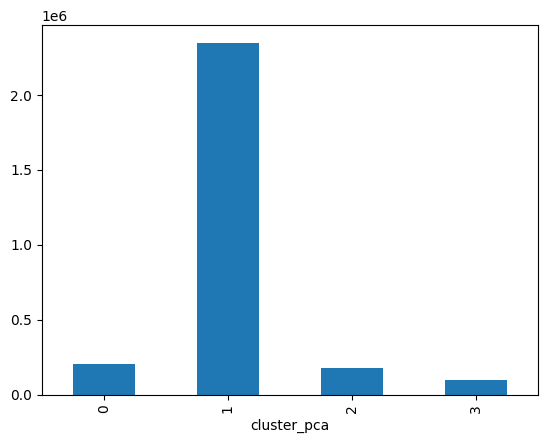

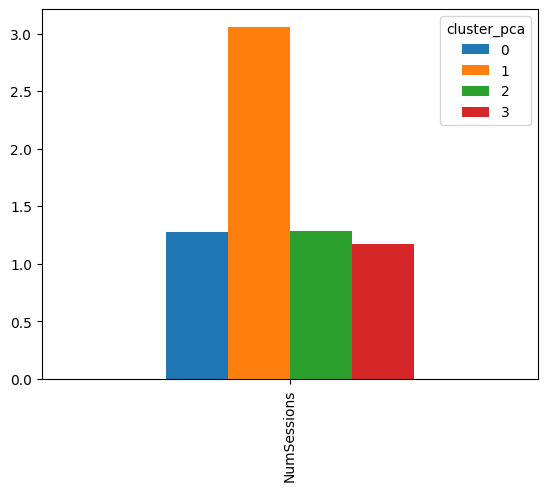

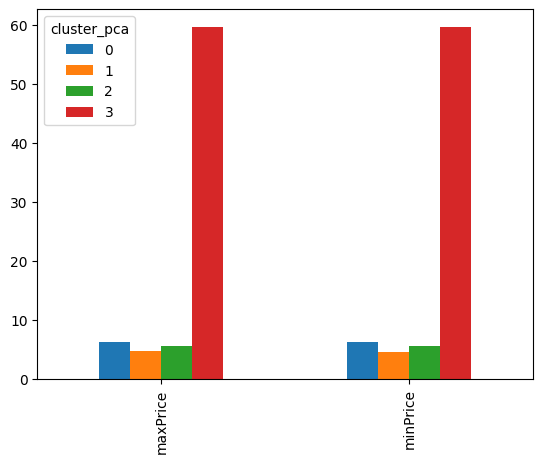

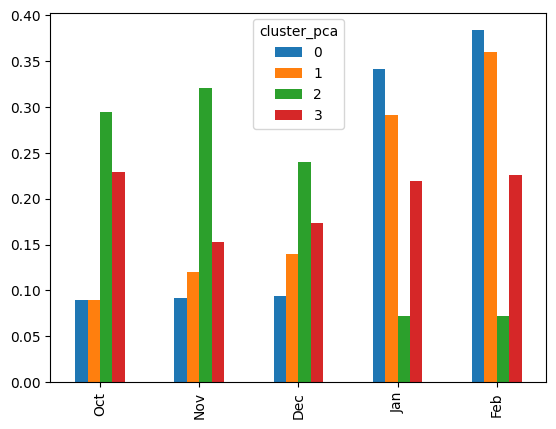

In [47]:
plt_data1 = past.groupby(['cluster_pca'])['interactionTime'].mean()
plt_data1 = plt_data1.transpose()
plt_data1.plot(kind='bar');
print('The Cluster 1 users are highly involved in the maximum time of interaction')

plt_data1 = past.groupby(['cluster_pca'])[['NumSessions']].mean()
plt_data1 = plt_data1.transpose()
plt_data1.plot(kind='bar');
print('The Cluster 1 users are highly involved in the maximum time of session')

plt_data2 = past.groupby(['cluster_pca'])[['maxPrice','minPrice']].mean()
plt_data2 = plt_data2.transpose()
plt_data2.plot(kind='bar');

plt_data3 = past.groupby(['cluster_pca'])[['Oct','Nov','Dec','Jan','Feb']].mean()
plt_data3 = plt_data3.transpose()
plt_data3.plot(kind='bar');

#### Use of label spreading to leverage small amount of labeled data

1. The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose.

- Read the data from `new.csv` and save it in a dataframe named `new`


In [55]:
new = pd.read_csv('../dat/new.csv.gz')
new.shape
new.columns
new.head()

# Test the shape
assert new.shape == (30091, 5)

# Check the number of product_ids in both the past dataframe and new dataframe
common_pids = np.intersect1d(past['product_id'], new['product_id']).size
print(f'The number of common product IDs : {common_pids}')

(30091, 5)

Index(['product_id', 'maxPrice', 'minPrice', 'Purchased?', 'Category'], dtype='object')

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


The number of common product IDs : 0


In [56]:
# What percentage of data points resulted in a purchase in the test set?
# In reality, we won't be able to calculate information that is not available to you. 
# Here, we simply demonstrated that the distributions in target between past and new are similar.

new['Purchased?'].value_counts() / new.shape[0]


0    0.655744
1    0.344256
Name: Purchased?, dtype: float64

2. Create ndarrays: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

- The `Purchased?` column is the target.
- `X_train` and `X_test` should contain the same features
- `product_id` should not be a feature.


In [57]:
X_train = past[['maxPrice', 'minPrice', 'Category']].to_numpy()
y_train = past[['Purchased?']].to_numpy()

X_test = new[['maxPrice', 'minPrice', 'Category']].to_numpy()
y_test = new[['Purchased?']].to_numpy()

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

assert type(X_train) == np.ndarray
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

3. Let's fit a simple logistic regression on the training set `(X_train, y_train)` and report performance on the test set `(X_test, y_test)`

In [59]:
lr = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

/Users/monusingh/opt/miniconda3/envs/venv-ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



4. Re-assemble data for semi-supervised learning.

- Use the features from the test set along with the features from the training set.
- Only use the labels from the training set but none from the test set.

Since we're using a large number of sampled features, but only a small number of these samples have labels, this is semi-supervised learning.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [61]:
X = np.concatenate((X_train, X_test), axis=0)
assert X.shape == (35091, 3)


In [63]:
# Create the target array y by concatenating y_train with a vector of -1's, 
# effectively creating a dummy label for the X_test rows in X. Check the shape of the array. 
# It should have as many values as X has rows.

dummy_label = np.full((len(y_test), 1), fill_value=-1)
dummy_label.shape
y_test.shape
y = np.concatenate((y_train, dummy_label), axis=0)
y.shape

assert X.shape[0] == y.shape[0]


(30091, 1)

(30091, 1)

(35091, 1)

5. Semi-supervised learning.

Scikit-learn provides two label propagation models: `LabelPropagation` and `LabelSpreading`. Both work by constructing a similarity graph over all items in the input dataset. 

`LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. 

We will be using scikit-learn's `LabelSpreading` model with `kNN`.

Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

 

In [66]:
# Import Usuals
from sklearn.semi_supervised import LabelSpreading
label_spread_model = LabelSpreading(kernel='knn', alpha=0.01).fit(X, y)

# You can get the predictions from the transduction_ attribute. 
# Note that there is a value for every row in X, so select just the values that correspond to X_test.

y[5000]
y_label_prop = label_spread_model.transduction_
y_label_prop[5000]

# X_test result start at 5000 and go to end
semi_sup_preds = label_spread_model.transduction_ # Propogate unlabeled to labeled via model
semi_sup_preds = semi_sup_preds[5000:len(semi_sup_preds)] # Only keep X_tes
semi_sup_preds.shape

assert semi_sup_preds.shape[0] == X_test.shape[0]

print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report
print(classification_report(y_test, y_pred)) # Compare with supervised model


/Users/monusingh/opt/miniconda3/envs/venv-ml/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-1])

0

(30091,)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     19732
           1       0.80      0.63      0.71     10359

    accuracy                           0.82     30091
   macro avg       0.81      0.77      0.79     30091
weighted avg       0.82      0.82      0.81     30091

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



*When using Label Spreading, the precision and F1 scores improved as well as the accuracy. The recall improved for purchases and slightly became worse for non-purchases. The improvements were due to the fact that we now have more labeled data to work with given the semi-supervised algorithm, and this was especially effective for purchases. This allowed Label Spreading to take advantage of additional information the Logistic Regression algorithm did not have at its disposal and thus improve the overall results generally across the board.*
